# 13wk-51: 아이스크림(type무의미) / 자료분석(Autogluon)

최규빈  
2023-12-01

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-yqIX6EyIErVtflwk7p8LeM&si=v_1Q2rBbNPCgSnta>

# 2. Imports

In [1]:
#!pip install autogluon.eda

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

# 3. Data

In [8]:
df_train = pd.read_csv('https://raw.githubusercontent.com/guebin/MP2023/main/posts/mid/icesales_train.csv')

In [9]:
df_train.head()

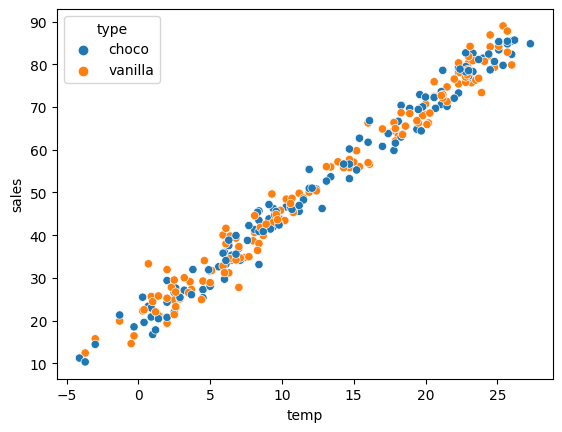

In [10]:
sns.scatterplot(df_train,x='temp',y='sales',hue='type')

# 4. 적합

In [11]:
# step1 -- pass
# step2
predictr = TabularPredictor(label='sales')
# step3
predictr.fit(df_train)
# step4
yhat = predictr.predict(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_105859/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231201_105859/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #26~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Thu Jul 13 16:27:29 UTC 2
Disk Space Avail:   248.43 GB / 490.57 GB (50.6%)
Train Data Rows:    280
Train Data Columns: 2
Label Column: sales
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
    Label info (max, min, mean, stddev): (88.99437629756306, 10.335207096486446, 51.10189, 21.16757)
    If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess t

[1000]  valid_set's rmse: 3.11194

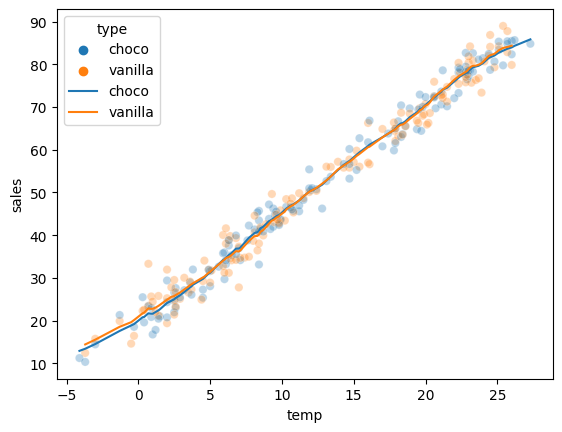

In [14]:
sns.scatterplot(df_train,x='temp',y='sales',hue='type',alpha=0.3)
sns.lineplot(df_train,x='temp',y=yhat,hue='type')

In [15]:
predictr.leaderboard(silent=True)

# 5. 해석 및 시각화

## A. y의 분포, (X,y)의 관계 시각화

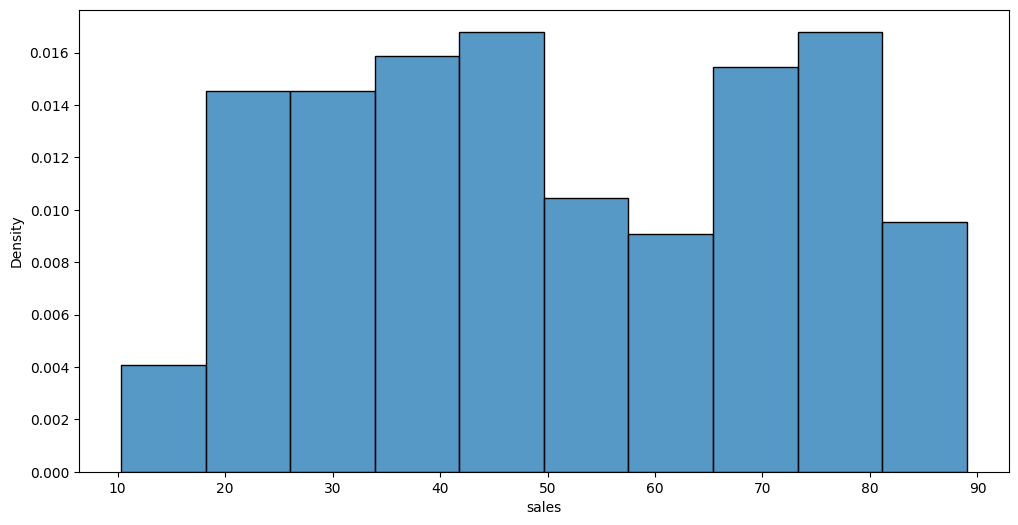

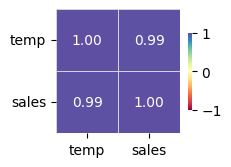

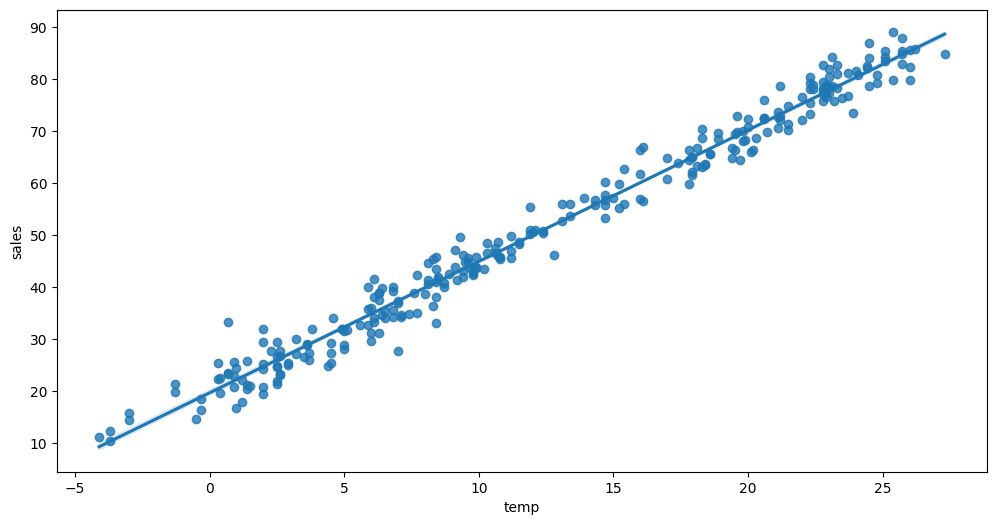

In [16]:
auto.target_analysis(
    train_data=df_train,
    label='sales',
    fit_distributions=False
)

## B. 중요한 설명변수

No path specified. Models will be saved in: "AutogluonModels/ag-20231201_110230/"

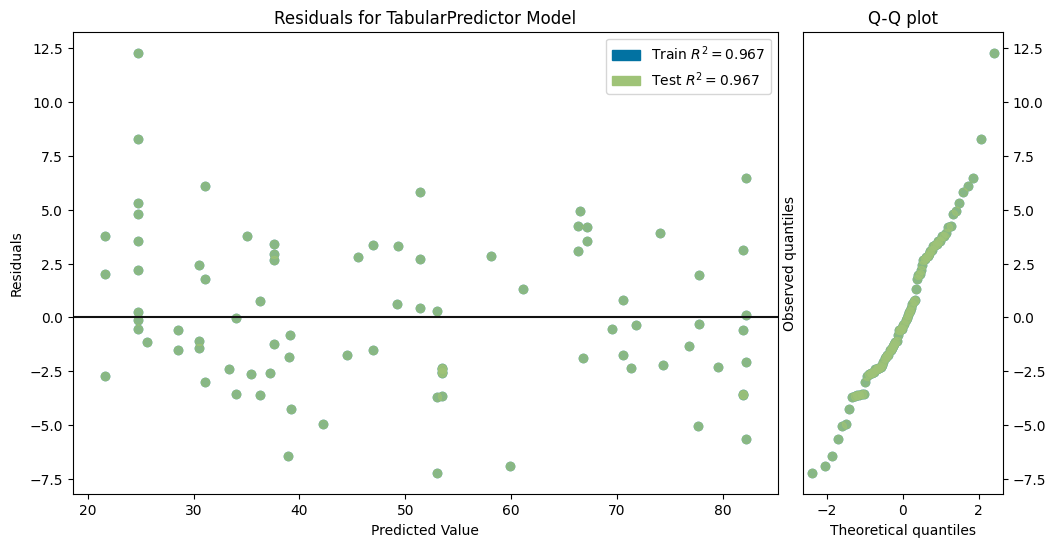

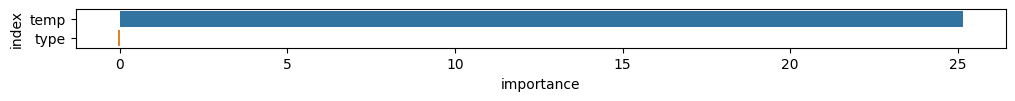

In [17]:
auto.quick_fit(
    train_data=df_train,
    label='sales',
    show_feature_importance_barplots=True
)

## C. 관측치별 해석

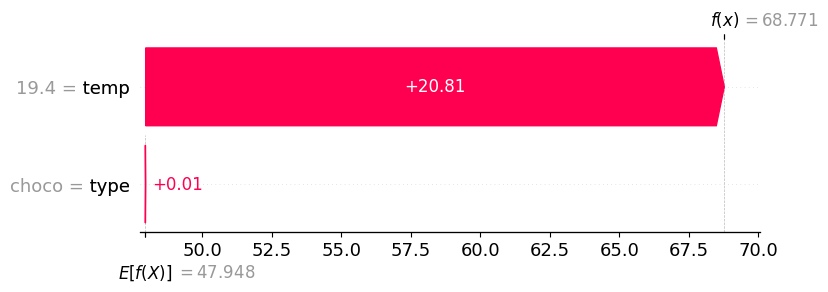

In [20]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[0]],
    display_rows=True,
    plot='waterfall'
)   

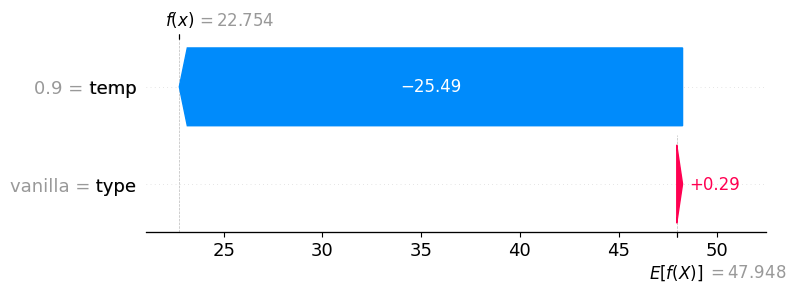

In [21]:
auto.explain_rows(
    train_data=df_train,
    model=predictr,
    rows=df_train.iloc[[1]],
    display_rows=True,
    plot='waterfall'
)   